In [2]:
#Make necessary imports
import pandas as pd
import seaborn as sn
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [3]:
#read/import the data set
df=pd.read_csv(r'dataset/train.csv')

#changing labels
conversion_dict = {0: 'Real', 1: 'Fake'}
df['label'] = df['label'].replace(conversion_dict)

#get the no. of fake and real data
df.label.value_counts()

Fake    10413
Real    10387
Name: label, dtype: int64

In [4]:
#splitting the data set
x_train,x_test,y_train,y_test=train_test_split(df['text'], df['label'], test_size=0.25, random_state=7, shuffle=True)

#initialize TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)

In [5]:
#fit and transform train set
vec_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U')) 
#transfrom test set
vec_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

In [6]:
#initialize a PassiveAggressiveClassifier and fit training sets
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(vec_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

In [8]:
#predict on the test set and calculate accuracy
y_pred=pac.predict(vec_test)
score=accuracy_score(y_test,y_pred)
print(f'PAC Accuracy: {round(score*100,2)}%')

PAC Accuracy: 96.23%


In [9]:
confusion_matrix(y_test,y_pred, labels=['Real','Fake'])

array([[2487,   99],
       [  97, 2517]], dtype=int64)

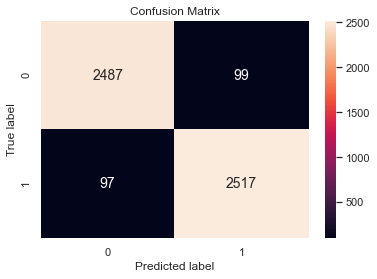


Classification Report: 
               precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      2614
        Real       0.96      0.96      0.96      2586

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



In [10]:
#build confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=['Real','Fake'])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Creating classification report
print('\nClassification Report: \n', classification_report(y_test, (y_pred)))

In [11]:
X=tfidf_vectorizer.transform(df['text'].values.astype('U'))

In [12]:
scores = cross_val_score(pac, X, df['label'].values, cv=5)
print(f'K Fold Accuracy: {round(scores.mean()*100,2)}%')

K Fold Accuracy: 96.25%


In [14]:
#import the new dataset which the model have not seen
test = pd.read_csv(r'dataset/news.csv')
test.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [15]:
#this function predicts if the text is real or fake
def findlabel(newtext):
    vec_newtest=tfidf_vectorizer.transform([newtext])
    y_pred1=pac.predict(vec_newtest)
    return y_pred1[0]

In [16]:
#loop through each row and saves the prediction for each text in a list
list_pred=[]
for i in range(len(test['text'])):
    pred=findlabel((test['text'][i]))
    list_pred.append(pred)

In [17]:
#display table with true label and predicted label
test = pd.read_csv(r'dataset/news.csv')
test['prediction']=list_pred
test.to_csv('result.csv')
test

,Unnamed: 0,title,text,label,prediction
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Fake
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Fake
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Real
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Fake
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Fake
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,Fake
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,Fake
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Fake
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,Real


In [18]:
#calculate accuracy in integrating new dataset
new=pd.read_csv(r'result.csv')
matches=sum(new['label'].str.strip().str.lower() == new['prediction'].str.strip().str.lower())
print(f"Accuracy: {round((matches/6335)*100,2)}%")

Accuracy: 78.39%
